<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction

by Gary, Hao Ming and Jun Hong

---
## Part 2: Exploratory Data Analysis & Data Preprocessing 

### Contents:
- [EDA](#EDA)
- [Preprocessing](#Preprocessing)

---

## EDA

In [1]:
# Import libraries 
import numpy as np
import pandas as pd

# Visual
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

# Mapping
from sklearn.neighbors import KernelDensity

# import itertools
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

In [2]:
spray = pd.read_csv("../assets/spray_cleaned.csv")
weather = pd.read_csv("../assets/weather_cleaned.csv")
df_train = pd.read_csv("../assets/df_train.csv")
df_test = pd.read_csv("../assets/df_test.csv")

### Spray

In [3]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14199 non-null  object 
 1   Latitude   14199 non-null  float64
 2   Longitude  14199 non-null  float64
 3   Year       14199 non-null  int64  
 4   Month      14199 non-null  int64  
 5   Week       14199 non-null  int64  
 6   Day        14199 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 776.6+ KB


In [4]:
spray.head()

,Date,Latitude,Longitude,Year,Month,Week,Day
0,2011-09-07,41.981433,-87.787777,2011,9,36,2
1,2011-09-07,41.980998,-87.787778,2011,9,36,2
2,2011-09-07,41.980560,-87.787762,2011,9,36,2
3,2011-09-07,41.980198,-87.787758,2011,9,36,2
4,2011-09-07,41.979752,-87.787765,2011,9,36,2


In [5]:
spray.describe()

,Latitude,Longitude,Year,Month,Week,Day
count,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000
mean,41.898456,-87.732111,2012.778435,7.907599,32.919572,2.744066
std,0.097461,0.061096,0.627747,0.660006,2.433308,0.458592
min,41.713925,-87.871023,2011.000000,7.000000,29.000000,2.000000
25%,41.782290,-87.788612,2013.000000,7.000000,30.000000,2.000000
50%,41.937205,-87.724390,2013.000000,8.000000,33.000000,3.000000
75%,41.976710,-87.691572,2013.000000,8.000000,35.000000,3.000000
max,42.018907,-87.586727,2013.000000,9.000000,36.000000,4.000000


In [6]:
spray["Date"] = pd.to_datetime(spray["Date"])

In [7]:
spray['Year'].value_counts()

2013    12626
2011     1573
Name: Year, dtype: int64

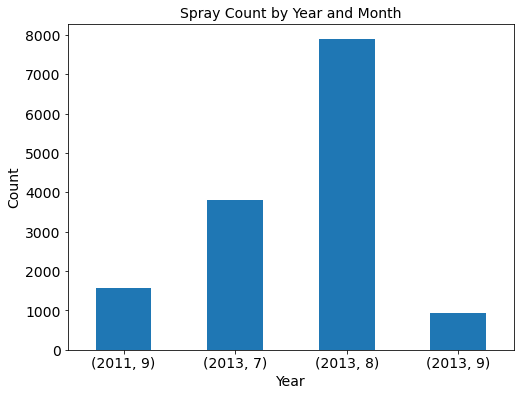

In [8]:
spray.groupby(['Year', 'Month']).Day.count().plot.bar(figsize=(8,6))

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

plt.title('Spray Count by Year and Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year',fontsize=14)

plt.show()

Spray data is only available for year 2011 and 2013. We can merge with the train dataset to evaluate the effects of spraying during this period.

### Train

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8475 non-null   object 
 1   Species               8475 non-null   object 
 2   Trap                  8475 non-null   object 
 3   Latitude              8475 non-null   float64
 4   Longitude             8475 non-null   float64
 5   NumMosquitos          8475 non-null   int64  
 6   WnvPresent            8475 non-null   int64  
 7   Tmax                  8475 non-null   float64
 8   Tmin                  8475 non-null   float64
 9   Tavg                  8475 non-null   float64
 10  DewPoint              8475 non-null   float64
 11  WetBulb               8475 non-null   float64
 12  PrecipTotal           8475 non-null   float64
 13  StnPressure           8475 non-null   float64
 14  SeaLevel              8475 non-null   float64
 15  ResultSpeed          

In [10]:
df_train["Date"] = pd.to_datetime(df_train["Date"])

In [11]:
df_train['WnvPresent'].value_counts(normalize = True)

0    0.946077
1    0.053923
Name: WnvPresent, dtype: float64

Presence of WNV found in around 5.4% of mosquitos from train dataset. As this is an imbalanced dataset, data preprocessing will be required before running the classification models (e.g. SMOTE).

In [12]:
df_train[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').sum()

,NumMosquitos,WnvPresent
Species,,
CULEX ERRATICUS,7,0
CULEX PIPIENS,44671,184
CULEX PIPIENS/RESTUANS,66268,225
CULEX RESTUANS,23431,48
CULEX SALINARIUS,145,0
CULEX TARSALIS,7,0
CULEX TERRITANS,510,0


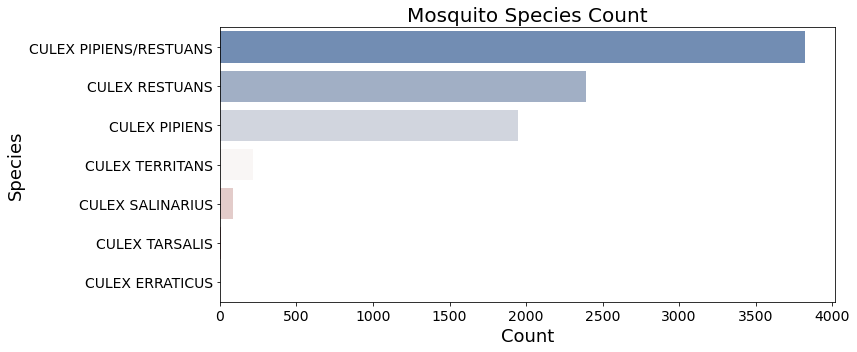

In [13]:
# Species vs WnvPresent
# Plot total mosquito species count

plt.figure(figsize=(12,5))
sns.countplot(data=df_train, 
              y= 'Species',
              order = df_train['Species'].value_counts().index,
              palette="vlag"
             )
plt.title('Mosquito Species Count', fontsize=20)
plt.ylabel('Species',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.xlabel('Count',fontsize=18)
plt.tight_layout();

Majority of mosquitos caught are *Culex pipiens* and *Culex restuans*.

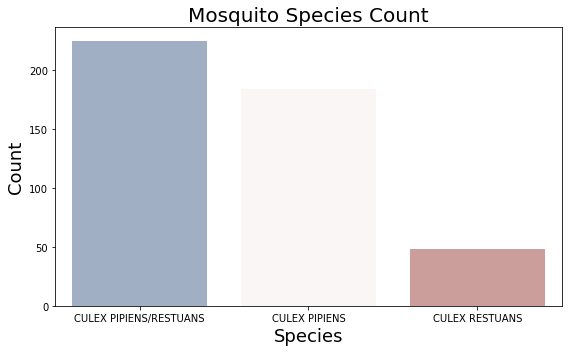

In [14]:
# Plot species count with WnvPresent

plt.figure(figsize=(8,5))
sns.countplot(data=df_train, 
              x= df_train[df_train['WnvPresent'] == 1]['Species'],
              order = df_train[df_train['WnvPresent'] == 1]['Species'].value_counts().index,
              palette="vlag")

plt.title('Mosquito Species Count', fontsize=20)
plt.xlabel('Species',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.tight_layout();

The mosquito species found with WNV belongs to *Culex pipiens* and *Culex restuans* as well.

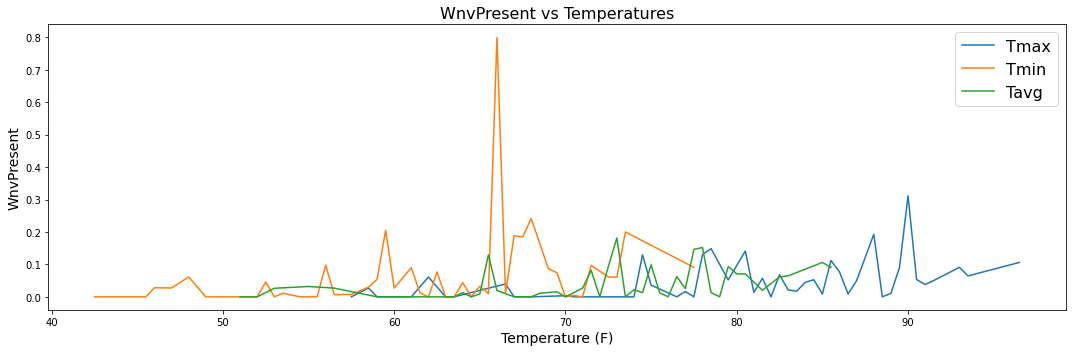

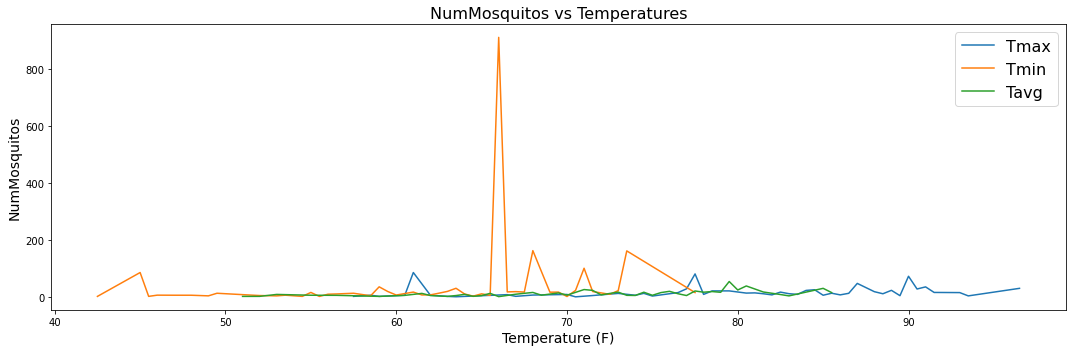

In [15]:
# Tmax, Tmin, Tavg, vs WnvPresent
plt.figure(figsize=(15,5))
sns.lineplot(x = 'Tmax',y = 'WnvPresent', data = df_train, ci = None, label = 'Tmax')
sns.lineplot(x = 'Tmin',y = 'WnvPresent', data = df_train, ci = None, label = 'Tmin')
sns.lineplot(x = 'Tavg',y = 'WnvPresent', data = df_train, ci = None, label = 'Tavg')
plt.legend(fontsize = 16)
plt.title('WnvPresent vs Temperatures', fontsize=16)
plt.xlabel('Temperature (F)',fontsize=14)
plt.ylabel('WnvPresent',fontsize=14)
plt.tight_layout();

plt.figure(figsize=(15,5))
sns.lineplot(x = 'Tmax',y = 'NumMosquitos', data = df_train, ci = None, label = 'Tmax')
sns.lineplot(x = 'Tmin',y = 'NumMosquitos', data = df_train, ci = None, label = 'Tmin')
sns.lineplot(x = 'Tavg',y = 'NumMosquitos', data = df_train, ci = None, label = 'Tavg')
plt.legend(fontsize = 16)
plt.title('NumMosquitos vs Temperatures', fontsize=16)
plt.xlabel('Temperature (F)',fontsize=14)
plt.ylabel('NumMosquitos',fontsize=14)
plt.tight_layout();

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. Based on plots above, there are some fluctuations in mosquito counts after 60F and a sharp peak at around 65F. This temperature range could create a suitable environment for mosquito breeding. 

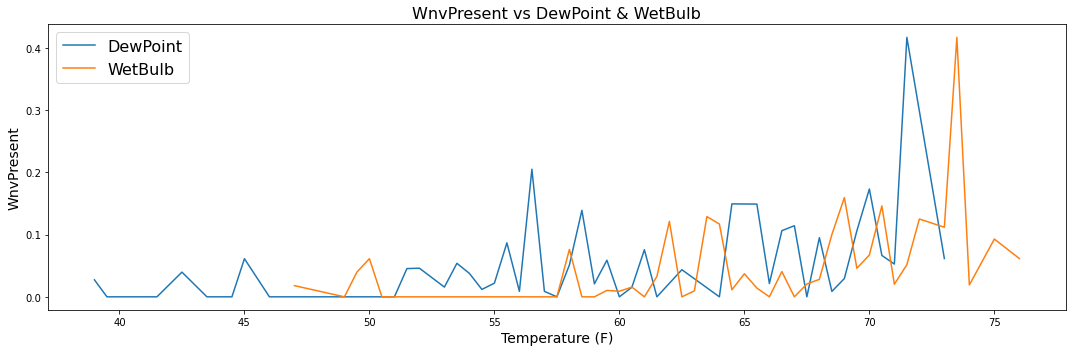

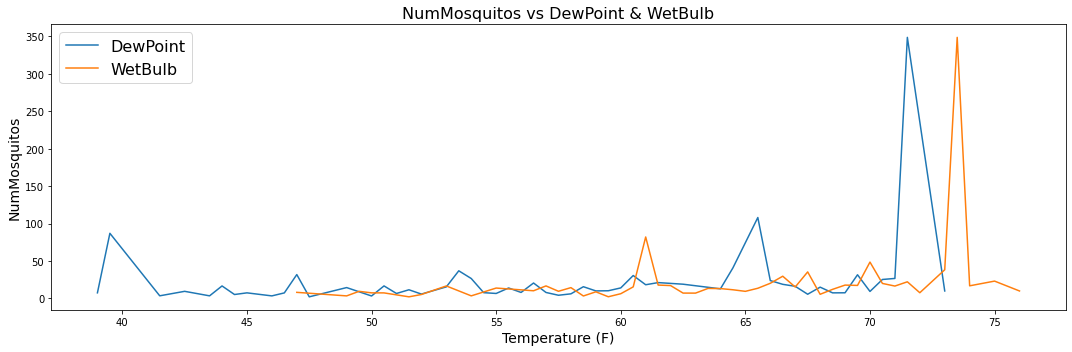

In [16]:
# DewPoint and WetBulb vs WnvPresent
plt.figure(figsize=(15,5))
sns.lineplot(x = 'DewPoint',y = 'WnvPresent', data = df_train, ci = None, label = "DewPoint")
sns.lineplot(x = 'WetBulb',y = 'WnvPresent', data = df_train, ci = None, label = "WetBulb")
plt.legend(fontsize = 16)
plt.title('WnvPresent vs DewPoint & WetBulb', fontsize=16)
plt.xlabel('Temperature (F)',fontsize=14)
plt.ylabel('WnvPresent',fontsize=14)
plt.tight_layout();

plt.figure(figsize=(15,5))
sns.lineplot(x = 'DewPoint',y = 'NumMosquitos', data = df_train, ci = None, label = "DewPoint")
sns.lineplot(x = 'WetBulb',y = 'NumMosquitos', data = df_train, ci = None, label = "WetBulb")
plt.legend(fontsize = 16)
plt.title('NumMosquitos vs DewPoint & WetBulb', fontsize=16)
plt.xlabel('Temperature (F)',fontsize=14)
plt.ylabel('NumMosquitos',fontsize=14)
plt.tight_layout();

Similar to the temperature graphs, there are more variations in mosquito counts after 60F. Peaks are found between 70F and 75F.

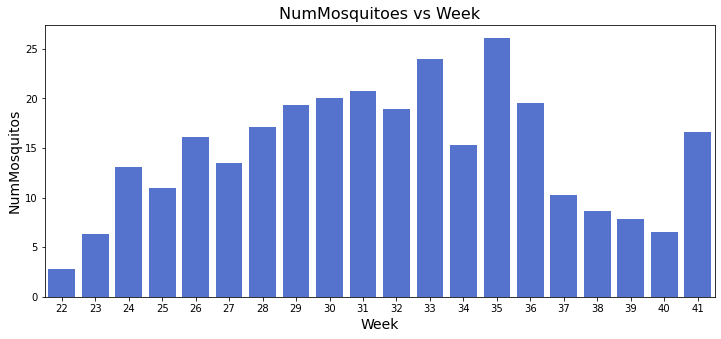

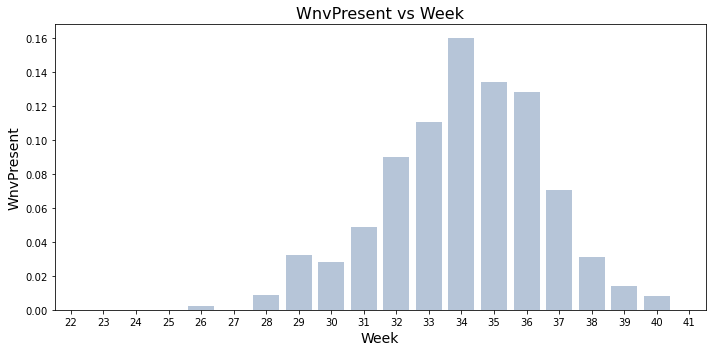

In [17]:
# NumMosquitoes against time, see any seasonality in the virus

plt.figure(figsize=(12,5))
sns.barplot(x = 'Week',y = 'NumMosquitos', data = df_train, ci=None, color='royalblue')
plt.title('NumMosquitoes vs Week', fontsize=16)
plt.xlabel('Week',fontsize=14)
plt.ylabel('NumMosquitos',fontsize=14)

plt.figure(figsize=(10,5))
sns.barplot(x = 'Week',y = 'WnvPresent', data = df_train, ci = None, color='lightsteelblue')
plt.title('WnvPresent vs Week', fontsize=16)
plt.xlabel('Week',fontsize=14)
plt.ylabel('WnvPresent',fontsize=14)

plt.tight_layout();

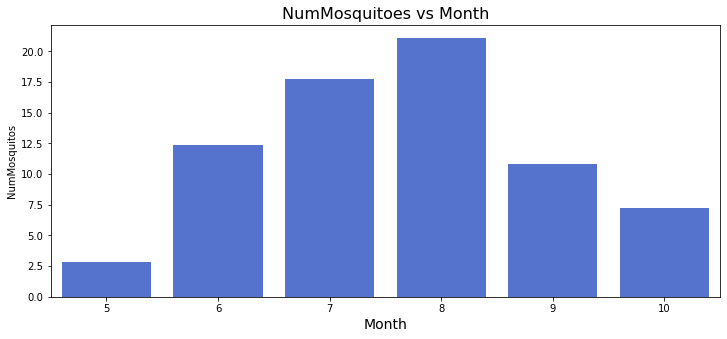

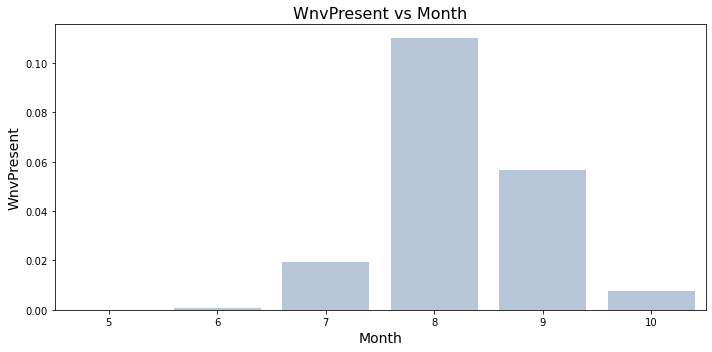

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'Month',y = 'NumMosquitos', data = df_train, ci = None, color='royalblue')
plt.title('NumMosquitoes vs Month', fontsize=16)
plt.xlabel('Month',fontsize=14)

plt.figure(figsize=(10,5))
sns.barplot(x = 'Month',y = 'WnvPresent', data = df_train, ci = None, color='lightsteelblue')
plt.title('WnvPresent vs Month', fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('WnvPresent',fontsize=14)

plt.tight_layout();


The number of cases would increase from July (week 27), peak in Aug (week 34) and decline by end Sep (week 40). 

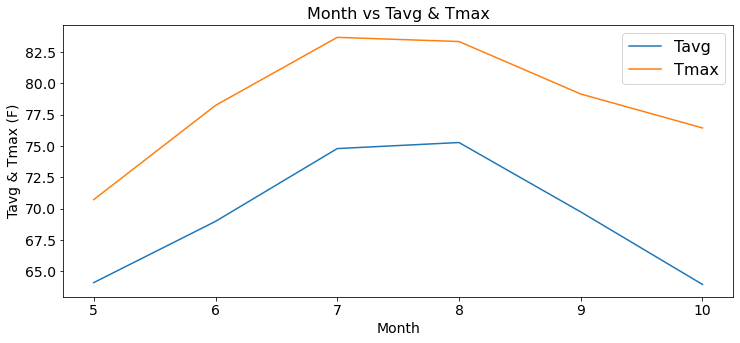

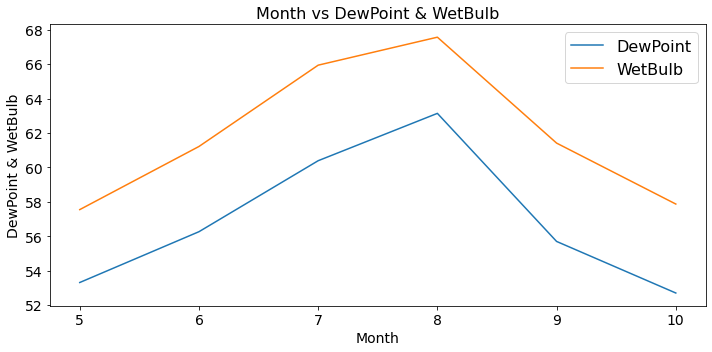

In [19]:
#Temperatures against time

plt.figure(figsize=(12,5))
sns.lineplot(x = 'Month',y = 'Tavg', data = df_train, ci = None, label = "Tavg")
sns.lineplot(x = 'Month',y = 'Tmax', data = df_train, ci = None, label = "Tmax")
plt.legend(fontsize = 16)
plt.title('Month vs Tavg & Tmax', fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Tavg & Tmax (F)',fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.figure(figsize=(10,5))
sns.lineplot(x = 'Month',y = 'DewPoint', data = df_train, ci = None, label = "DewPoint")
sns.lineplot(x = 'Month',y = 'WetBulb', data = df_train, ci = None, label = "WetBulb")
plt.legend(fontsize = 16)
plt.title('Month vs DewPoint & WetBulb', fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('DewPoint & WetBulb',fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.tight_layout();

As the period between Jul to Sep is Summer in Chicago, the weather would become hotter and drier, which are favourable conditions for mosquitos to breed. 

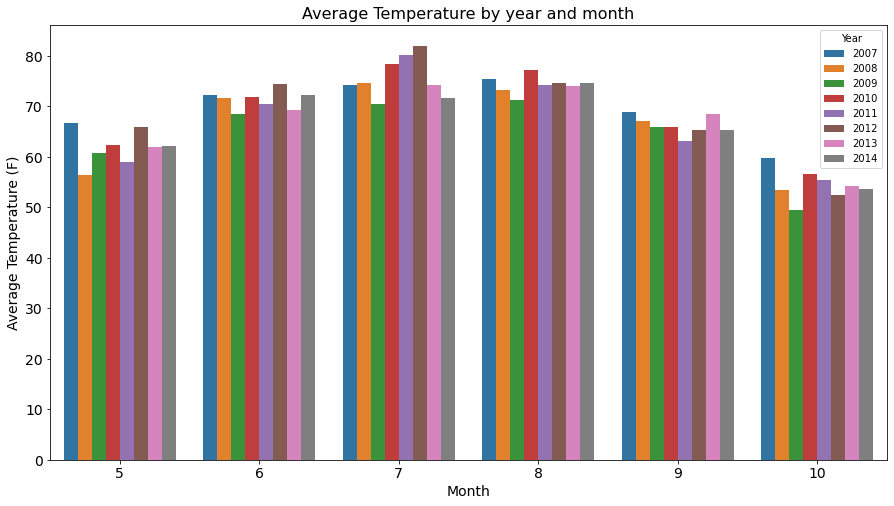

In [20]:
# Avg temp changes across month and year

plt.figure(figsize=(15,8))

sns.barplot(data=weather,x='Month',y='Tavg',hue='Year', ci=None)

plt.title('Average Temperature by year and month', fontsize=16)
plt.ylabel('Average Temperature (F)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.tick_params(labelsize=14)

The average temperature readings by month are similar across the years.

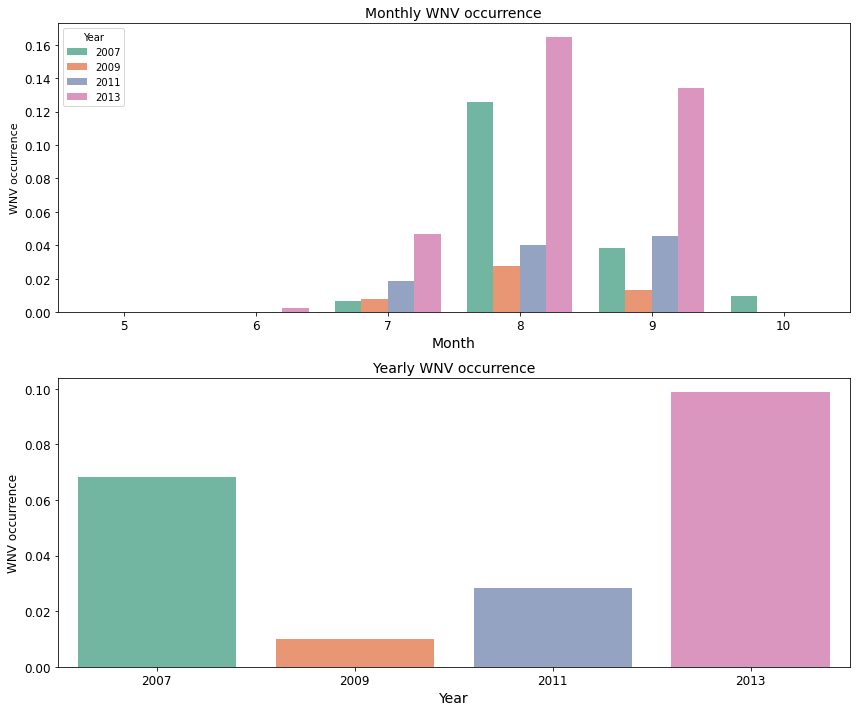

In [21]:
# WNV occurrence across Month and Year
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(12, 10))
wnv = df_train[['WnvPresent','Year','Month']]
sns.barplot(x = 'Month', y= 'WnvPresent', data = wnv, hue = 'Year', ci=None, palette = 'Set2', ax=ax[0])
ax[0].set_title('Monthly WNV occurrence', fontsize=14)
ax[0].set_ylabel('WNV occurrence',fontsize=11)
ax[0].set_xlabel('Month', fontsize=14)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x = 'Year', y= 'WnvPresent', data = wnv, ci=None, palette = 'Set2', ax=ax[1])
ax[1].set_title('Yearly WNV occurrence', fontsize=14)
ax[1].set_ylabel('WNV occurrence',fontsize=12)
ax[1].set_xlabel('Year', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.tight_layout();

Comparing across the years, the surge would start from July, peak in Aug and decline after Sep. <br>
Looking at Yearly WNV occurrence, the cases declined in 2009 but increased after, in spite of spraying efforts made in 2011 and 2013.

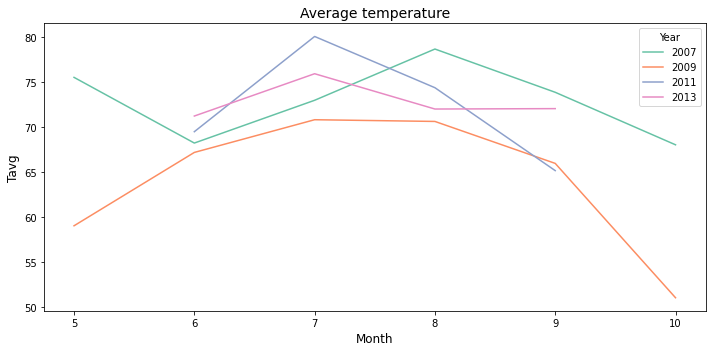

In [22]:
# Temperature changes across Month and Year

plt.figure(figsize=(10,5))
sns.lineplot(x = 'Month', y= 'Tavg', data = df_train, hue = 'Year', ci=None, palette = 'Set2')
plt.title('Average temperature', fontsize=14)
plt.ylabel('Tavg',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.tight_layout()

The number of WNV cases is similar to the weather patterns. As temperatures start to increase in July, the mosquito counts will increase as well. The counts will decline in September when temperature becomes lower. 

Next, we will review the spraying efforts made with the train dataset.

In [23]:
#Define a function that takes in data 
def plotHeatMap(data, a_cm,ax):
    if(len(data) > 0):
        X = data[['Longitude', 'Latitude']].values
        kd = KernelDensity(bandwidth=0.02)
        kd.fit(X)
        xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
        gridpoints = np.array([xv.ravel(),yv.ravel()]).T
        zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
        ax.imshow(zv, 
                   origin='lower', 
                   cmap=a_cm, 
                   extent=lon_lat_box, 
                   aspect=aspect)

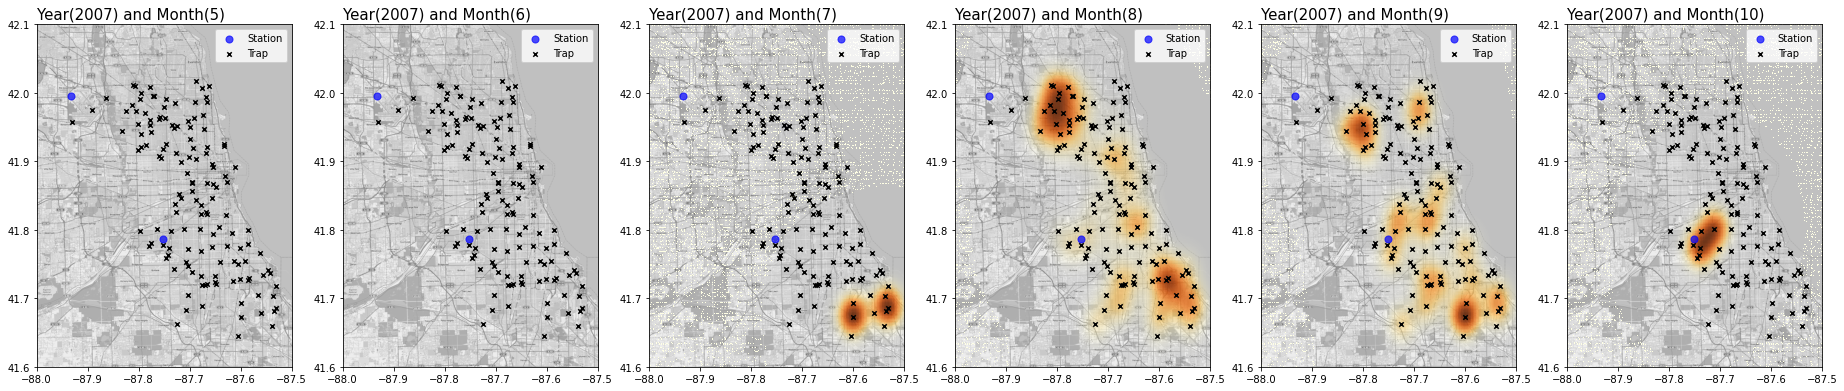

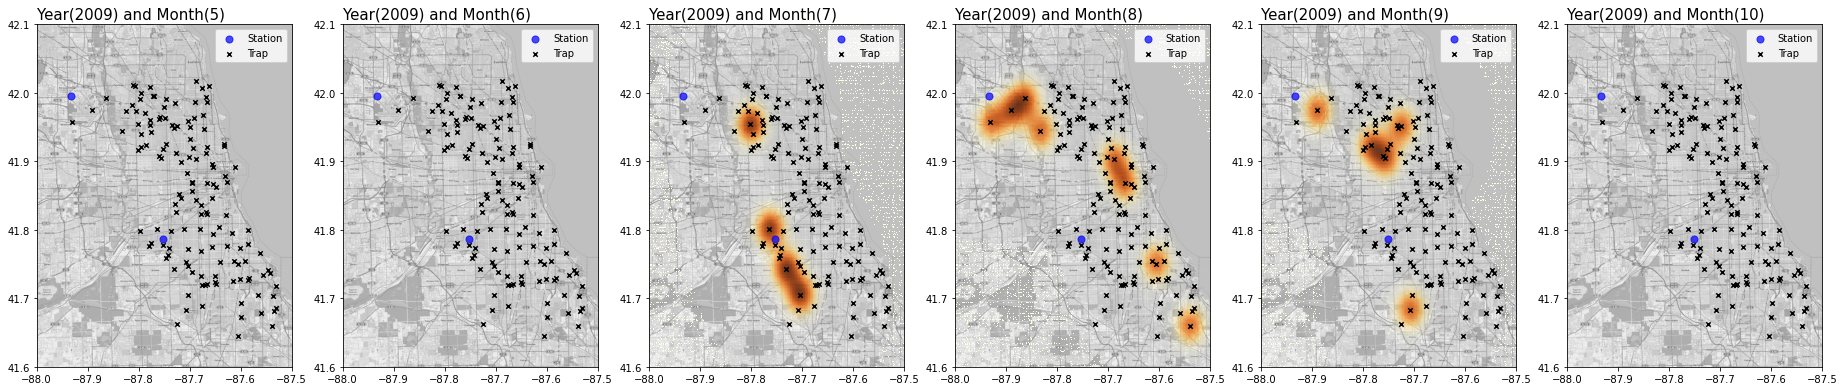

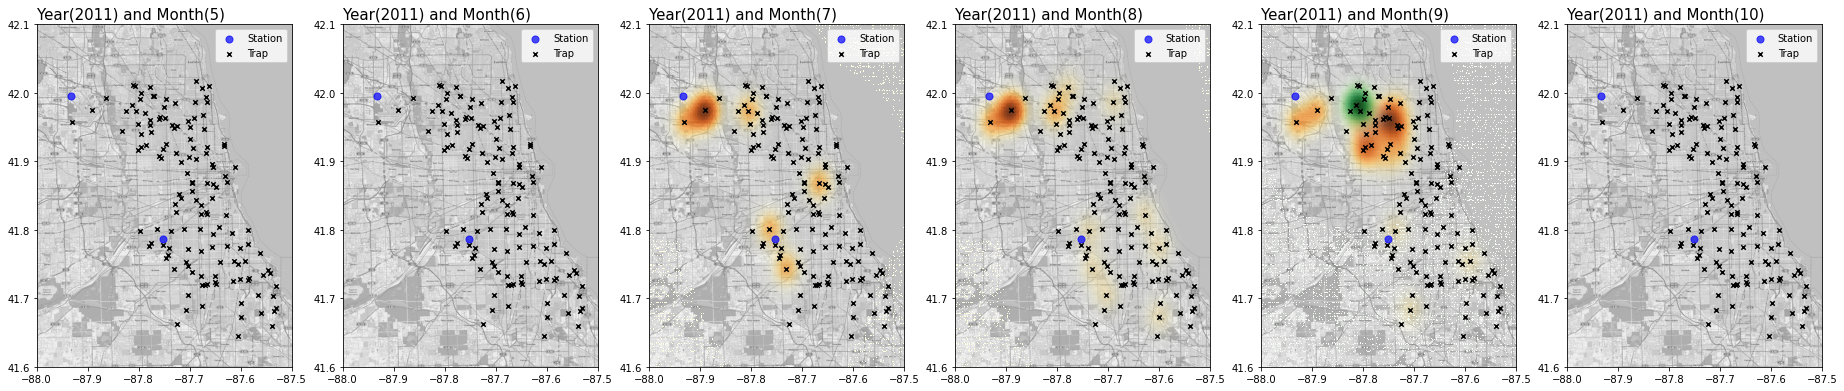

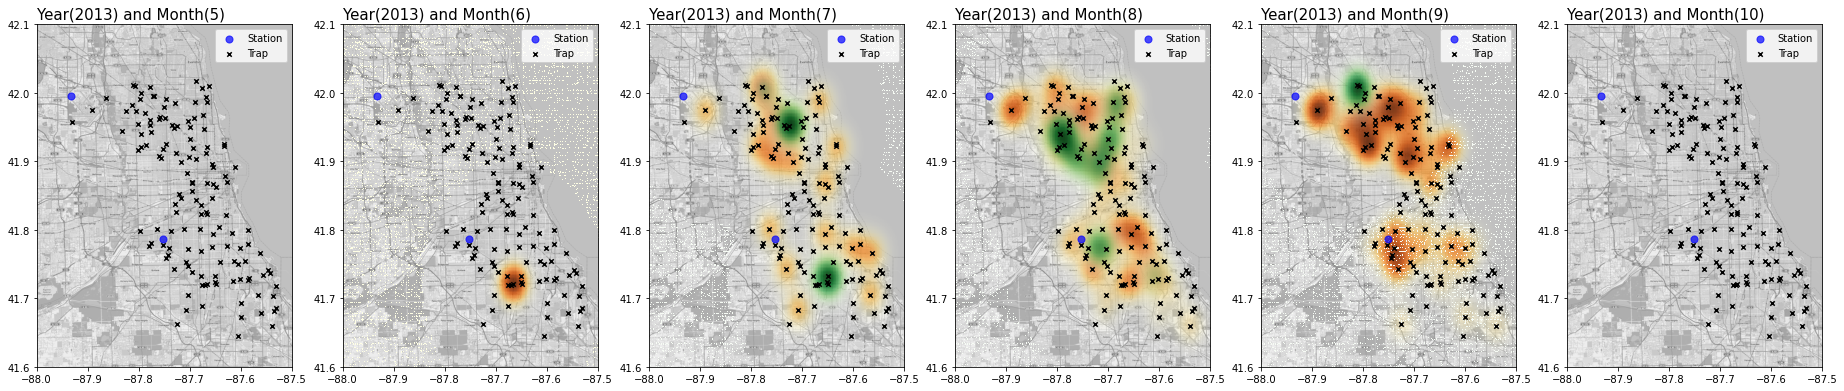

In [24]:
# load map
mapdata = np.loadtxt('../assets/mapdata_copyright_openstreetmap_contributors.txt')

# heatmap settings
alpha_wnv = plt.cm.YlOrBr
alpha_wnv._init()
alpha_wnv._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_wnv.N) / 10 - 1)[::-1]
alpha_sp = plt.cm.Greens
alpha_sp._init()
alpha_sp._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_wnv.N) / 10 - 1)[::-1]

# setting boundaries for map
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# create plot for each month and year 
#loop year
for year in df_train['Date'].dt.year.unique():
    fig, ax = plt.subplots(ncols = 6, figsize = (32,10))
    
    #loop month
    for i, month in enumerate(df_train['Date'].dt.month.unique()):
        # plot basemap
        ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
        current_plot = ax.ravel()
        
        # plot station locations
        station = np.array([[-87.933, 41.995], [-87.752, 41.786]])
        ax[i].scatter(station[:,0], station[:,1], marker='o', c = 'blue', s = 50, alpha = 0.7, label = 'Station')
        
        # plot wnv locations
        wnv = df_train[(df_train['Date'].dt.year == year) & (df_train['Date'].dt.month == month) & (df_train['WnvPresent'] == 1)]
        wnv = wnv.groupby(['Date','Trap', 'Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
        plotHeatMap(wnv, alpha_wnv,ax[i])
        
        if year==2011:
           # include spray location
           spray__2011 = spray[(spray['Date'].dt.year==2011) & (spray['Date'].dt.month == month)]
           spray__2011 = spray__2011.groupby(['Date','Longitude', 'Latitude']).max().reset_index()
           plotHeatMap(spray__2011, alpha_sp,ax[i])
           
        if year==2013:
           # include spray location
           spray__2013 = spray[(spray['Date'].dt.year==2013) & (spray['Date'].dt.month == month)]
           spray__2013 = spray__2013.groupby(['Date','Longitude', 'Latitude']).max().reset_index()
           plotHeatMap(spray__2013, alpha_sp,ax[i])
        
        # plot trap locations
        locations = df_train[['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(locations[:,0], locations[:,1], marker='x', c = 'black', s = 20, alpha = 1, label = 'Trap')
        
        
        # title and axes
        ax[i].set_title(f"Year({year}) and Month({month})", fontsize = 15, ha = 'left', position = (0,1))
        ax[i].legend()

The trap locations (black cross), mosquitos caught with WNV (yellow) and spray locations (green) are mapped and compared against each month and year. <br>
- Cases would increase in July and end in Oct.
- Spraying was carried out in 2011 and 2013. 
- For 2011, the reduction of cases could be due to the end of season, as the spraying was conducted in Sep.
- For 2013, the WNV clusters continued to increase despite the spraying efforts. More information would be required to determine whether spraying is ineffective or a change in strategy is required (e.g. targeted spraying).

Hence, due to limited information, we would not be including the spray dataset into our model. 

## Preprocessing

### Train

In [25]:
df_train['Trap'].nunique()

136

There are 136 unique traps listed in the train dataset. We will drop `Trap` as a feature and keep lat/long as the location-related feature instead.

As we have `Year`, `Month`, `Week` as individual features, we will remove `Date` from the dataset.

In [26]:
df_train.drop(columns = ['Trap', 'Date'], inplace = True)

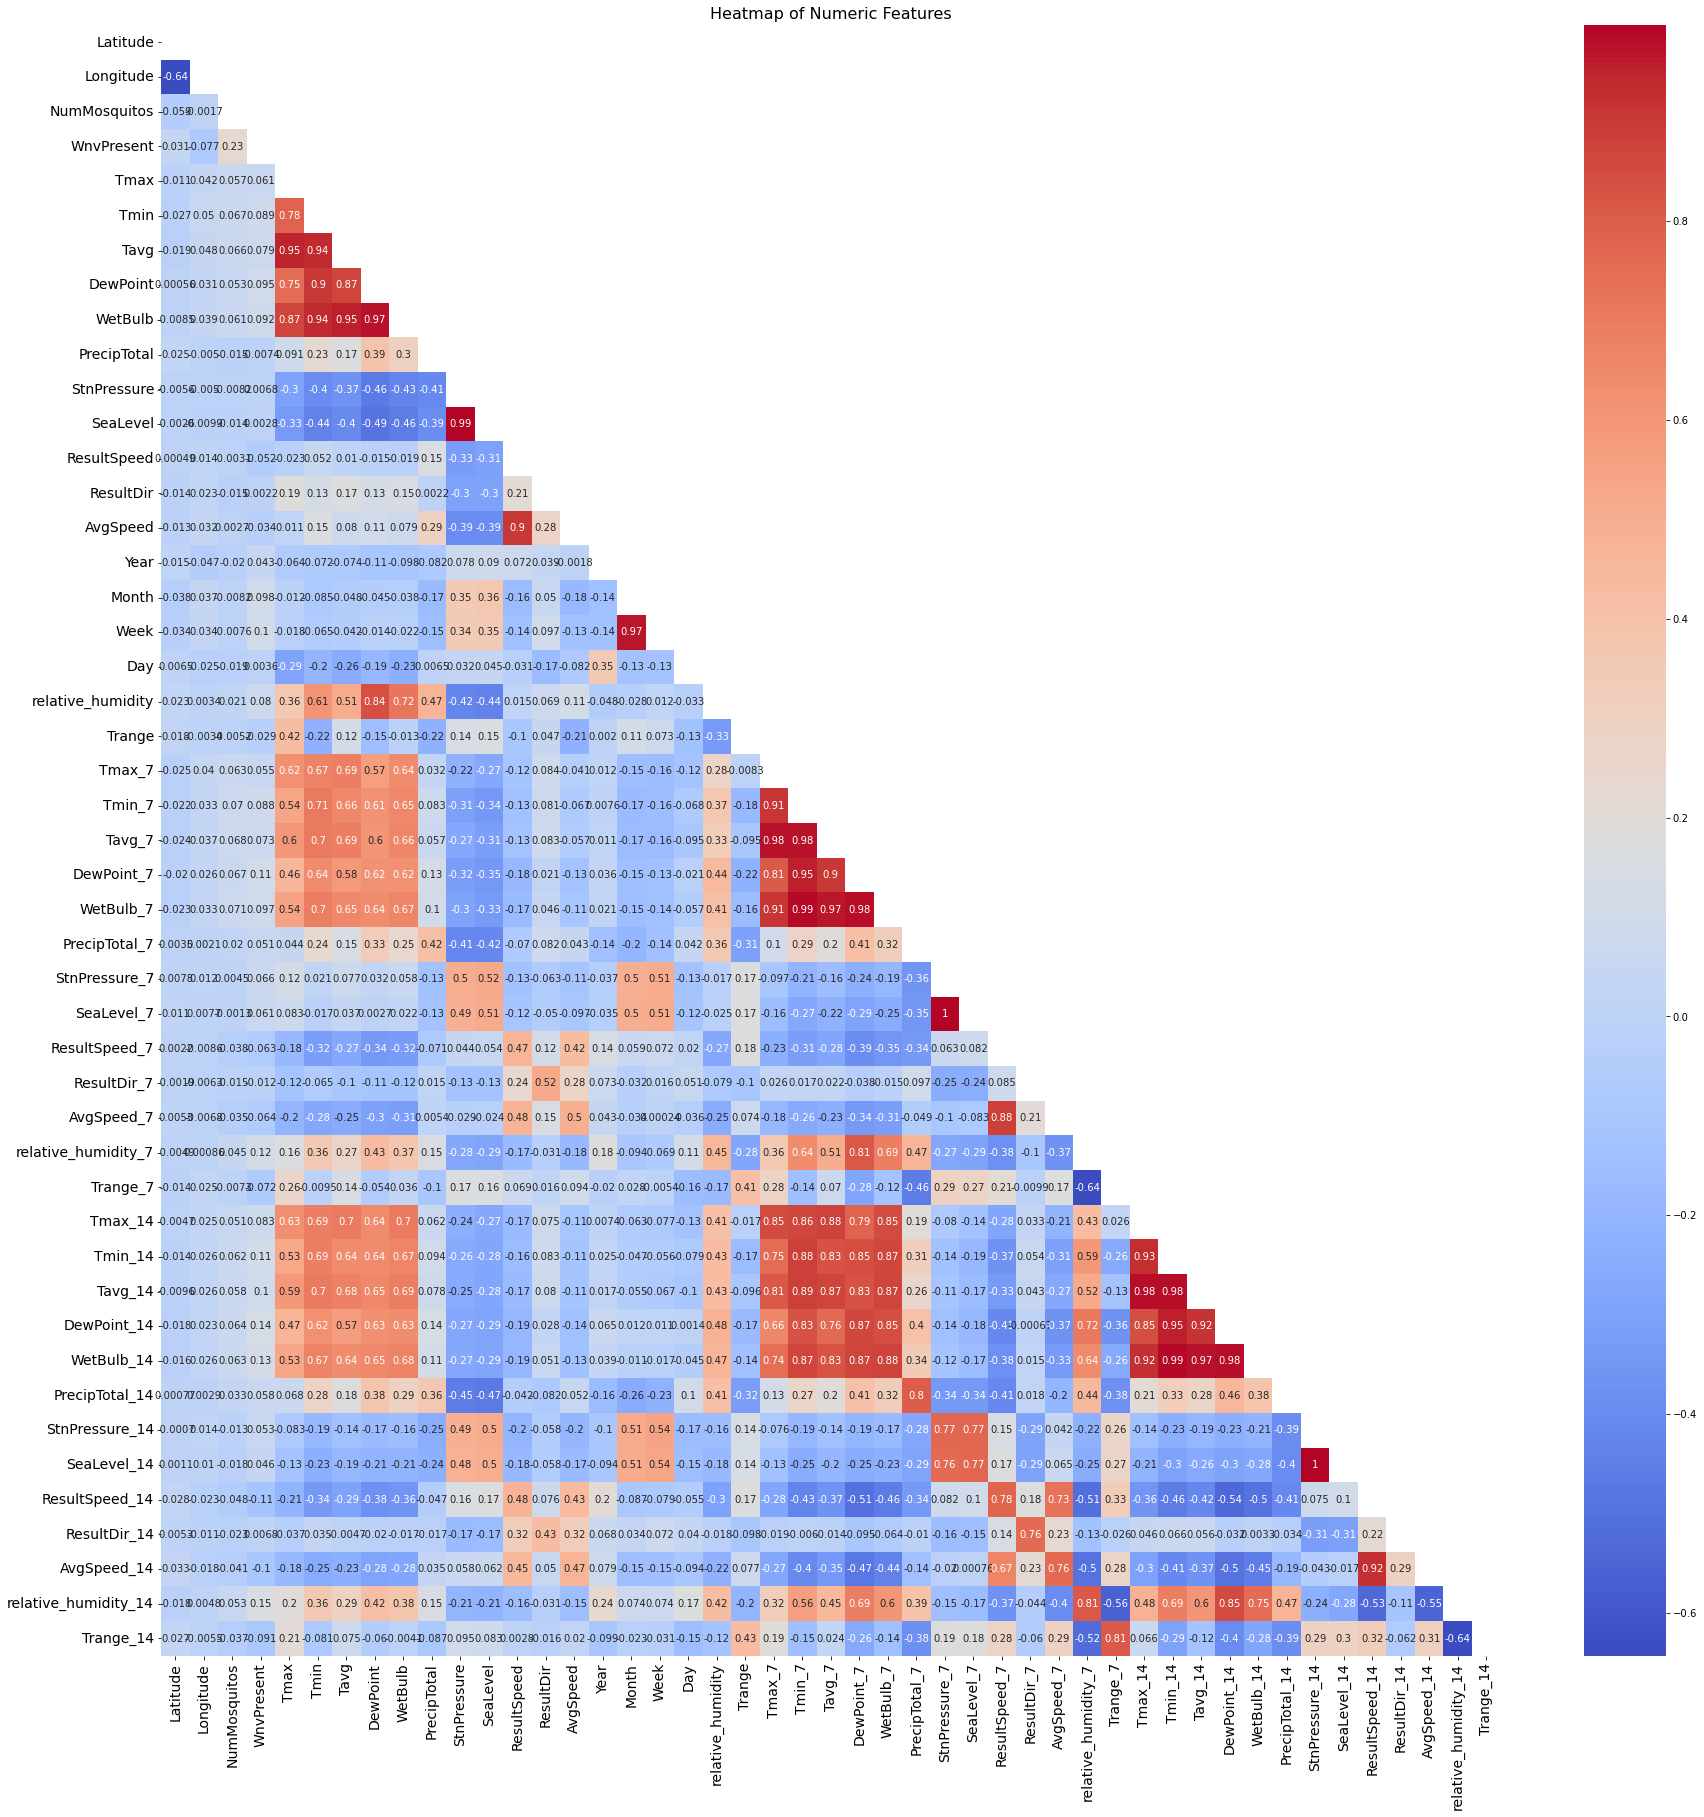

In [27]:
# Plotting a heatmap to visually examine the correlation of numeric features 

plt.figure(figsize=(30,30))

mask = np.zeros_like(df_train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

res = sns.heatmap(df_train.corr(), mask=mask, annot=True, cmap='coolwarm')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)

plt.title('Heatmap of Numeric Features', fontsize = 16);

Existing features does not show high correlation coefficients with WnvPresent. 

We will remove features with high multicollinearity (> 0.95) to reduce variance of the model.

In [28]:
# Drop high multicollinearity features

df_train.drop(columns = ['Tavg', 'Tavg_7' , 'Tavg_14',
                         'Tmin','Tmin_7', 'Tmin_14',
                         'StnPressure',  'StnPressure_7','StnPressure_14',
                         'DewPoint','DewPoint_7', 'DewPoint_14',
                         'Week', 'Year', 'Day'
                     ], inplace=True)


In [29]:
# Create dummy variables for Species and Month
df_train = pd.get_dummies(data=df_train, prefix=['Species', 'Month'],columns=['Species','Month'],drop_first=False, dtype='int64')

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        8475 non-null   float64
 1   Longitude                       8475 non-null   float64
 2   NumMosquitos                    8475 non-null   int64  
 3   WnvPresent                      8475 non-null   int64  
 4   Tmax                            8475 non-null   float64
 5   WetBulb                         8475 non-null   float64
 6   PrecipTotal                     8475 non-null   float64
 7   SeaLevel                        8475 non-null   float64
 8   ResultSpeed                     8475 non-null   float64
 9   ResultDir                       8475 non-null   float64
 10  AvgSpeed                        8475 non-null   float64
 11  relative_humidity               8475 non-null   int64  
 12  Trange                          84

### Test

In [31]:
# Create dummy variables for Species and Month
df_test = pd.get_dummies(data=df_test, prefix=['Species', 'Month'],columns=['Species','Month'],drop_first=False, dtype='int64')

In [32]:
# Drop unwanted columns
df_test.drop(columns = ['Date', 'Trap',
                      'Tavg', 'Tavg_7' , 'Tavg_14',
                         'Tmin','Tmin_7', 'Tmin_14',
                         'StnPressure',  'StnPressure_7','StnPressure_14',
                         'DewPoint','DewPoint_7', 'DewPoint_14',
                         'Week', 'Year', 'Day'
                          ], inplace = True)


In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              116293 non-null  int64  
 1   Latitude                        116293 non-null  float64
 2   Longitude                       116293 non-null  float64
 3   Tmax                            116293 non-null  float64
 4   WetBulb                         116293 non-null  float64
 5   PrecipTotal                     116293 non-null  float64
 6   SeaLevel                        116293 non-null  float64
 7   ResultSpeed                     116293 non-null  float64
 8   ResultDir                       116293 non-null  float64
 9   AvgSpeed                        116293 non-null  float64
 10  relative_humidity               116293 non-null  int64  
 11  Trange                          116293 non-null  int64  
 12  Tmax_7          

In [34]:
#Checking for columns from train and test datasets

In [35]:
set_a = set(df_train.columns)
set_b = set(df_test.columns)
#in test but not in train set
print(set_a.difference(set_b))
print(' ')
#in train set but not in test set
print(set_b.difference(set_a))
#put differences of column features of, (in test but not in train) into a variable 'list_a'
list_a = list(set_a.difference(set_b))
list_b = list(set_b.difference(set_a))

{'WnvPresent', 'Month_5', 'NumMosquitos'}
 
{'Species_UNSPECIFIED CULEX', 'Id'}


There is no May records in test dataset. We will remove from train dataset.

In [36]:
df_train.drop(columns = 'Month_5', inplace=True)

In the test dataset, there is an additional feature `Species_UNSPECIFIED CULEX` from `Species`.

In [37]:
df_test['Species_UNSPECIFIED CULEX'].value_counts()

0    101948
1     14345
Name: Species_UNSPECIFIED CULEX, dtype: int64

There are 14345 entries for this feature. In order to account for this feature in our train dataset, we will group the mosquito species with no WNV detected. Therefore, we will then have `Species_CULEX ERRATICUS`, `Species_CULEX PIPIENS`, `Species_CULEX PIPIENS/RESTUANS` and `Species_OTHERS`. 

In [38]:
# For train

In [39]:
df_train['Species_OTHERS'] = df_train[
    'Species_CULEX SALINARIUS'] + df_train[
    'Species_CULEX TARSALIS'] + df_train[
    'Species_CULEX TERRITANS'] + df_train[
    'Species_CULEX ERRATICUS']


In [40]:
df_train.drop(columns = ['Species_CULEX SALINARIUS',
                      'Species_CULEX TARSALIS', 
                      'Species_CULEX TERRITANS',
                         'Species_CULEX ERRATICUS'], inplace=True)

In [41]:
# For test

In [42]:
df_test['Species_OTHERS'] = df_test[
    'Species_CULEX SALINARIUS']+ df_test[
    'Species_CULEX TARSALIS'] + df_test[
    'Species_CULEX TERRITANS'] + df_test[
    'Species_CULEX ERRATICUS'] + df_test[
    'Species_UNSPECIFIED CULEX']

In [43]:
df_test.drop(columns = ['Species_CULEX SALINARIUS', 
                     'Species_CULEX TARSALIS', 
                     'Species_CULEX TERRITANS',
                        'Species_CULEX ERRATICUS',
                     'Species_UNSPECIFIED CULEX'], inplace=True)

In [44]:
# Listing correlation with WnvPresent

df_train.corr()['WnvPresent'].sort_values(ascending=False)

WnvPresent                        1.000000
NumMosquitos                      0.233532
Month_8                           0.172630
relative_humidity_14              0.152227
WetBulb_14                        0.125114
relative_humidity_7               0.123711
Species_CULEX PIPIENS             0.097868
WetBulb_7                         0.096862
WetBulb                           0.092120
Tmax_14                           0.082879
relative_humidity                 0.080443
SeaLevel_7                        0.061488
Tmax                              0.060530
PrecipTotal_14                    0.057988
Tmax_7                            0.054873
PrecipTotal_7                     0.051465
SeaLevel_14                       0.046217
Latitude                          0.030862
Species_CULEX PIPIENS/RESTUANS    0.019620
ResultDir_14                      0.006787
Month_9                           0.006223
SeaLevel                          0.002797
ResultDir                         0.002226
PrecipTotal

Dropping features with coefficient less than |0.01|:

In [45]:
df_train.drop(columns = ['ResultDir_14', 'Month_9', 'SeaLevel', 'ResultDir', 'PrecipTotal'], inplace=True)

In [46]:
df_test.drop(columns = ['ResultDir_14', 'Month_9', 'SeaLevel', 'ResultDir', 'PrecipTotal'], inplace=True)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        8475 non-null   float64
 1   Longitude                       8475 non-null   float64
 2   NumMosquitos                    8475 non-null   int64  
 3   WnvPresent                      8475 non-null   int64  
 4   Tmax                            8475 non-null   float64
 5   WetBulb                         8475 non-null   float64
 6   ResultSpeed                     8475 non-null   float64
 7   AvgSpeed                        8475 non-null   float64
 8   relative_humidity               8475 non-null   int64  
 9   Trange                          8475 non-null   int64  
 10  Tmax_7                          8475 non-null   float64
 11  WetBulb_7                       8475 non-null   float64
 12  PrecipTotal_7                   84

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              116293 non-null  int64  
 1   Latitude                        116293 non-null  float64
 2   Longitude                       116293 non-null  float64
 3   Tmax                            116293 non-null  float64
 4   WetBulb                         116293 non-null  float64
 5   ResultSpeed                     116293 non-null  float64
 6   AvgSpeed                        116293 non-null  float64
 7   relative_humidity               116293 non-null  int64  
 8   Trange                          116293 non-null  int64  
 9   Tmax_7                          116293 non-null  float64
 10  WetBulb_7                       116293 non-null  float64
 11  PrecipTotal_7                   116293 non-null  float64
 12  SeaLevel_7      

In [49]:
#Export train dataset for modelling
df_train.to_csv('../assets/train_tomodel.csv', index = False)

In [50]:
#Export train dataset for modelling
df_test.to_csv('../assets/test_tomodel.csv', index = False)